In [ ]:
#OECD Migration - What affects it?
#Problem: I set out to machine learn the reasons factors that affect migration from one country to another.  
#As the issue of reliability of the data is important, I decided to limit my list of destination countries 
#to those that are members of the OECD.  As a political science major from a long time ago and an international news junkie, 
#I have always been one to peruse the OECD’s news site from time to time as it tends to be a great barometer
#in comparing developed countries.  


In [ ]:
#Background
#Ripped from the Headlines
#VALLETTA, Malta — Sweden on Thursday defended its decision to reintroduce border controls as European Union leaders signed an aid agreement worth 1.8 billion euros with African nations intended to stem the influx of migrants.
#Prime Minister Stefan Lofven of Sweden framed the issue as a temporary measure to maintain order, but the new controls represent another blow to a flagship European Union policy of allowing free movement of people across most of the bloc’s internal borders.
#The Continent is contending with the most serious migration crisis since World War II, and the move by Sweden highlights a shifting dynamic.
#“Migrants really only want to reach four or five countries and, among those, mainly Germany and Sweden,” said Martijn Pluim of the International Center for Migration Policy Development, an international organization based in Vienna.
#New York Times November 12, 2015


In [ ]:
#For those who are not familiar with the OECD, I will explain:
#The Organization for Economic Co-operation and Development (OECD) celebrated its 50th anniversary, but its roots go back to the rubble of Europe after World War II. Determined to avoid the mistakes of their predecessors in the wake of World War I, European leaders realized that the best way to ensure lasting peace was to encourage co-operation and reconstruction, rather than punish the defeated.
#The Organization for European Economic Cooperation (OEEC) was established in 1948 to run the US-financed Marshall Plan for reconstruction of a continent ravaged by war. By making individual governments recognize the interdependence of their economies, it paved the way for a new era of cooperation that was to change the face of Europe. Encouraged by its success and the prospect of carrying its work forward on a global stage, Canada and the US joined OEEC members in signing the new OECD Convention on 14 December 1960. The Organization for Economic Co-operation and Development (OECD) was officially born on 30 September 1961, when the Convention entered into force.
#Other countries joined in, starting with Japan in 1964. Today, 34 OECD member countries worldwide regularly turn to one another to identify problems, discuss and analyze them, and promote policies to solve them. The track record is striking. The US has seen its national wealth almost triple in the five decades since the OECD was created, calculated in terms of gross domestic product per head of population. Other OECD countries have seen similar, and in some cases even more spectacular, progress.
#So, too, have countries that a few decades ago were still only minor players on the world stage. Brazil, India and the People's Republic of China have emerged as new economic giants. The three of them, with Indonesia and South Africa, are Key Partners of the Organization and contribute to its work in a sustained and comprehensive manner. Together with them, the OECD brings around its table 39 countries that account for 80% of world trade and investment, giving it a pivotal role in addressing the challenges facing the world economy.


In [ ]:
#Method – Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for forecasting, time series modelling and finding the causal effect relationship between the variables.
#Regression analysis is an important tool for modelling and analyzing data. Here, we fit a curve / line to the data points, in such a manner that the differences between the distances of data points from the curve or line is minimized
#The first step was collecting data. I scoured the data module of the OECD’s statistics website (http://stats.oecd.org/) for factors that intuitively seemed to me to be reasons for choosing a destination country and placed them into a spreadsheet.
#While I found many some features on the OECD website, I felt it prudent to also include a search of the World Bank’s Data Site (http://data.worldbank.org/) as well in order to vary the features a bit.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import neighbors
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import grid_search
from sklearn import cross_validation
import statsmodels.formula.api as sm
%matplotlib inline

In [2]:
#Here is my aggregated data set:
df_migration = pd.read_csv('C:\Users\Microsoft\Dropbox\Family\Vincent\DataScience\Final Project\Migration Project Data Layout.csv')
dtype={'Value':int}  


In [3]:
df_migration.head()

,Country_and_Time_Period,Migration Change,% Expenditure on healthcare,Infrastructure as % of GDP,Taxing Wages,Infant Mortality,Change in Unemployment,GDP Growth,Life Expectancy
0,Australia 2001,0.193461,7.7040,0.8,21.20,5.2,0.417217,1.928669,79.634146
1,Australia 2002,-0.068793,7.8939,0.9,21.53,5.3,-0.347638,3.100574,80.062195
2,Australia 2003,0.036371,7.8996,1.0,21.96,5.0,-0.383958,3.491209,79.848171
3,Australia 2004,0.186612,8.1103,1.2,18.63,4.8,-0.425178,4.156585,80.490244
4,Australia 2005,0.104431,7.9778,1.3,20.80,4.7,-0.258171,3.216467,80.841463


In [4]:
list(df_migration)

['Country_and_Time_Period',
 'Migration Change',
 '% Expenditure on healthcare',
 'Infrastructure as % of GDP',
 'Taxing Wages',
 'Infant Mortality',
 'Change in Unemployment',
 'GDP Growth',
 'Life Expectancy']

In [5]:
#In the end, I exact y is defined as the change in migration year over year.  
#As the data was for 2000 through 2013, I was able to calculate the change for 13 years, 2001-2013.  
#As for my features (x values), I chose the following:
#1.	Expenditure on Healthcare as a percentage of GDP Source – (OECD Stats)
#2.	Infrastructure spending as a percentage of GDP. (OECD Stats)
#3.	Taxing Wages as a percentage of wages earned – (OECD Stats)
#4.	Infant Mortality as a percentage of recorded births – (OECD Stats)
#5.	Change in Unemployment percentage year over year.  (World Bank Data)
#6.	Change in GDP Growth year over year. (World Bank Data)
#7.	Life Expectancy in years.  – (OECD Stats)
#I normalized the target and features 5 & 6 into percentage change YOY through calculations 
#in excel and left the other features as is and created a CSV file to be read into an iPython Notebook.   


X = df_migration[['% Expenditure on healthcare',
 'Infrastructure as % of GDP',
 'Taxing Wages',
 'Infant Mortality',
 'Change in Unemployment',
 'GDP Growth',
 'Life Expectancy']]
Y= df_migration[['Migration Change']]

In [28]:
#My hypothesis at the beginning of this project was that while economic opportunity is not necessarily 
#the push that causes an individual to leave his own country, it might play heavily is his decision of the destination.  
#In other words, why would you go to the UK rather than Belgium?  
#Does word of mouth over job opportunities and the like affect choice?  
#Or is there something else going on here?  Does financial security or physical environment trump wages?    


In [6]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.2)   

In [7]:
X_train.corr()

,% Expenditure on healthcare,Infrastructure as % of GDP,Taxing Wages,Infant Mortality,Change in Unemployment,GDP Growth,Life Expectancy
% Expenditure on healthcare,1.000000,-0.164472,0.089083,-0.297754,0.189273,-0.349570,0.443464
Infrastructure as % of GDP,-0.164472,1.000000,-0.062759,-0.274516,-0.035731,0.129404,0.045742
Taxing Wages,0.089083,-0.062759,1.000000,-0.082352,0.022583,-0.151693,-0.188857
Infant Mortality,-0.297754,-0.274516,-0.082352,1.000000,-0.012265,0.184551,-0.594419
Change in Unemployment,0.189273,-0.035731,0.022583,-0.012265,1.000000,-0.635875,0.112697
GDP Growth,-0.349570,0.129404,-0.151693,0.184551,-0.635875,1.000000,-0.311103
Life Expectancy,0.443464,0.045742,-0.188857,-0.594419,0.112697,-0.311103,1.000000


In [8]:
lr_rgr = linear_model.LinearRegression()
lr_rgr.fit(X_train,y_train)
results = lr_rgr.fit(X_train,y_train)
print("coefficient {}".format(lr_rgr.coef_))
print("intercept {}".format(lr_rgr.intercept_))

LR_MSE = mean_squared_error(y_test, lr_rgr.predict(X_test))
print('Mean squared error for liner regression: {}'.format(LR_MSE))
print('R2: ', r2_score)

coefficient [[ 0.00168007  0.03071896 -0.00241606 -0.00428446 -0.06439758  0.00124852
  -0.02010262]]
intercept [ 1.72582962]
Mean squared error for liner regression: 0.067889058933
('R2: ', <function r2_score at 0x000000000C6A9AC8>)


In [9]:
sk_linreg_model = sk.linear_model.LinearRegression()
scaled_test_x = sk.preprocessing.scale(X_test)
scaled_train_x = sk.preprocessing.scale(X_train)
sk_linreg_model.fit(scaled_train_x,y_train.values)

linreg_error = mean_squared_error(y_test,sk_linreg_model.predict(scaled_test_x))
print('Linear Mean Squared Error is',linreg_error)
print 'Linear Regression Model Coefficients Are:' 
print([i for i in zip(sk_linreg_model.coef_,X_test.keys())])
print('R2: ', r2_score)

('Linear Mean Squared Error is', 0.067878724002441243)
Linear Regression Model Coefficients Are:
[(array([ 0.00337982,  0.01276776, -0.02504065, -0.01677627, -0.07317141,
        0.00369293, -0.05262166]), '% Expenditure on healthcare')]
('R2: ', <function r2_score at 0x000000000C6A9AC8>)


In [30]:
# Train the model using the training sets and check score
lr_rgr.fit(X_train, y_train)
lr_rgr.score(X_train, y_train)
#Equation coefficient and Intercept
print('Coefficient: \n', lr_rgr.coef_)
print('Intercept: \n', lr_rgr.intercept_)
#Predict Output
predicted= lr_rgr.predict(X_test)


('Coefficient: \n', array([[-0.00030477,  0.04204102, -0.00225293, -0.00405866, -0.05976579,
         0.00024677, -0.01750829]]))
('Intercept: \n', array([ 1.51975373]))


In [ ]:
#Regression coefficients represent the mean change in the response variable for one unit of change in the predictor 
#variable while holding other predictors in the model constant. 
#This statistical control that regression provides is important because it isolates 
#the role of one variable from all of the others in the model.

#The key to understanding the coefficients is to think of them as slopes, and they’re often called slope coefficients.


ValueError: x and y must be the same size

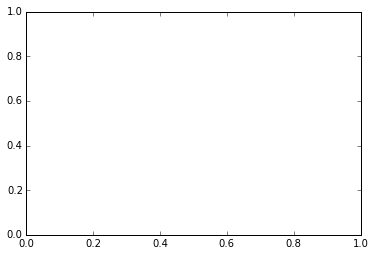

In [27]:
plt.scatter(scaled_test_x,np.ravel(y_test))
plt.title('Relationship between Factors and Migration')
plt.xlabel('X')
plt.ylabel('Y')

In [10]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 20)
knn_error = mean_squared_error(knn.fit(scaled_train_x, y_train).predict(scaled_test_x),y_test.values)
print('KNN Mean Squared Error is',knn_error)

('KNN Mean Squared Error is', 0.082936514144218765)


In [11]:
param_grid = [{'n_neighbors': range(1,50)}]

knn = neighbors.KNeighborsRegressor()
knn_cv = grid_search.GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(scaled_train_x, y_train.values)

knn_error = mean_squared_error(knn_cv.predict(scaled_test_x),y_test.values)
print('KNN Mean Squared Error is',knn_error)
print('Best n_neighbors is',knn_cv.best_params_['n_neighbors'])

('KNN Mean Squared Error is', 0.074052838693972306)
('Best n_neighbors is', 48)


In [ ]:
param_grid = [{'alpha': np.linspace(1e-10, 1, 50)}]

lasso_rgr = Lasso()
lasso_cv = grid_search.GridSearchCV(lasso_rgr, param_grid, cv=5)
lasso_cv.fit(scaled_train_x, y_train.values)
lasso_error = mean_squared_error(lasso_cv.predict(scaled_test_x),y_test.values)

print('Lasso Mean Squared Error is',lasso_error)
print('Best alpha is',lasso_cv.best_params_['alpha'])
print('Lasso Regression Model Coefficients Are:')
print([i for i in zip(lasso_cv.best_estimator_.coef_,X_train.keys())])

In [12]:
param_grid = [{'alpha': np.linspace(1e-10, 1, 50)}]
ridge_rgr = Ridge()
ridge_cv = grid_search.GridSearchCV(ridge_rgr, param_grid, cv=5)
ridge_cv.fit(scaled_train_x, y_train.values)
ridge_error = mean_squared_error(ridge_cv.predict(scaled_test_x),y_test.values)

print('Ridge Mean Squared Error is',ridge_error)
print('Best alpha is',ridge_cv.best_params_['alpha'])
print('Ridge Regression Model Coefficients Are:')
print([i for i in zip(ridge_cv.best_estimator_.coef_,X_train.keys())])

('Ridge Mean Squared Error is', 0.06784021024205085)
('Best alpha is', 1.0)
Ridge Regression Model Coefficients Are:
[(array([ 0.0032609 ,  0.0127404 , -0.02482125, -0.01655047, -0.07279244,
        0.00401106, -0.05218791]), '% Expenditure on healthcare')]


In [ ]:
#As shown above, 

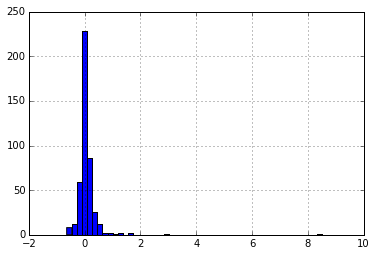

In [13]:
df_migration['Migration Change'].hist(bins=50)

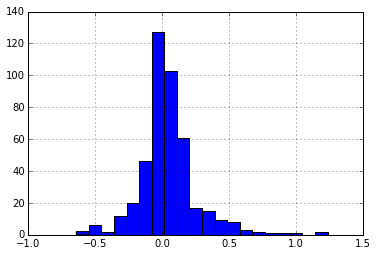

In [14]:
df_migration[df_migration['Migration Change']<1.5]['Migration Change'].hist(bins=20)

In [17]:
from sklearn.ensemble import RandomForestRegressor
param_grid = [{'n_estimators': range(20,90)}]
rgr = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
rgr.fit(X_train, np.ravel(y_train))
Random_Forest_cv = grid_search.GridSearchCV(rgr, param_grid, cv=5)
Random_Forest_cv.fit(scaled_train_x, np.ravel(y_train))
Random_Forest_error = mean_squared_error(Random_Forest_cv.predict(scaled_test_x),np.ravel(y_test))

In [18]:
print('Random_Forest_error Mean Squared Error is',Random_Forest_error)
print('Best n_estimators is',Random_Forest_cv.best_params_['n_estimators'])
print('Random Forest Regression Model feature_importances Are:')
print([i for i in zip(Random_Forest_cv.best_estimator_.feature_importances_,X_train.keys())])

('Random_Forest_error Mean Squared Error is', 0.050652990595333326)
('Best n_estimators is', 59)
Random Forest Regression Model feature_importances Are:
[(0.11198204830100876, '% Expenditure on healthcare'), (0.052870839774881453, 'Infrastructure as % of GDP'), (0.071205673930913649, 'Taxing Wages'), (0.089475204026026253, 'Infant Mortality'), (0.18162729616215745, 'Change in Unemployment'), (0.11165308821820051, 'GDP Growth'), (0.38118584958681195, 'Life Expectancy')]


In [19]:
from sklearn.ensemble import AdaBoostRegressor
param_grid = [{'n_estimators': range(50,100)}]
rgr = AdaBoostRegressor()
AdaBoost_cv = grid_search.GridSearchCV(rgr, param_grid, cv=5)
AdaBoost_cv.fit(X_train, np.ravel(y_train))
AdaBoost_error = mean_squared_error(AdaBoost_cv.predict(X_test),np.ravel(y_test))

In [20]:
print('AdaBoost_error Mean Squared Error is',AdaBoost_error)
print('Best n_estimators is',AdaBoost_cv.best_params_['n_estimators'])
print('AdaBoost Regression Model feature_importances Are:')
print([i for i in zip(AdaBoost_cv.best_estimator_.feature_importances_,X_train.keys())])

('AdaBoost_error Mean Squared Error is', 0.036345295880175092)
('Best n_estimators is', 71)
AdaBoost Regression Model feature_importances Are:
[(0.15900777248467868, '% Expenditure on healthcare'), (0.18274143381859229, 'Infrastructure as % of GDP'), (0.064169418160231514, 'Taxing Wages'), (0.14466596093897405, 'Infant Mortality'), (0.24907503159672026, 'Change in Unemployment'), (0.044871855714121812, 'GDP Growth'), (0.15546852728668129, 'Life Expectancy')]


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid = [{'n_estimators': range(50,100)}]
rgr = GradientBoostingRegressor()
GradientBoosting_cv = grid_search.GridSearchCV(rgr, param_grid, cv=5)
GradientBoosting_cv.fit(X_train, np.ravel(y_train))
GradientBoosting_error = mean_squared_error(GradientBoosting_cv.predict(X_test),np.ravel(y_test))

In [17]:
print('GradientBoosting_error Mean Squared Error is',GradientBoosting_error)
print('Best n_estimators is',GradientBoosting_cv.best_params_['n_estimators'])
print('GradientBoosting Regression Model feature_importances Are:')
print([i for i in zip(GradientBoosting_cv.best_estimator_.feature_importances_,X_train.keys())])

('GradientBoosting_error Mean Squared Error is', 0.071074905509577638)
('Best n_estimators is', 56)
GradientBoosting Regression Model feature_importances Are:
[(0.14339473683660739, '% Expenditure on healthcare'), (0.030670861680578306, 'Infrastructure as % of GDP'), (0.15094146566146058, 'Taxing Wages'), (0.12504323177482407, 'Infant Mortality'), (0.15934750853942573, 'Change in Unemployment'), (0.091678328876080531, 'GDP Growth'), (0.29892386663102333, 'Life Expectancy')]


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_squared_error

mse = make_scorer(mean_squared_error, greater_is_better = False)
poly = PolynomialFeatures(2)


#Polynomial
poly_rgr = linear_model.LinearRegression()
poly_rgr.fit(poly.fit_transform(X_train),y_train)
prediction = poly_rgr.predict(poly.fit_transform(X_test))
Poly_MSE = mean_squared_error(y_test, prediction )

#Polynomial Ridge 
ridge_poly_rgr = linear_model.Ridge()
ridge_poly_cv = grid_search.GridSearchCV(ridge_poly_rgr, param_grid,cv=5, scoring=mse)
ridge_poly_cv.fit(poly.fit_transform(scaled_train_x), np.ravel(y_test)
Ridge_Poly_MSE = mean_squared_error(y_test_scaled, ridge_poly_cv.best_estimator_.predict(poly.fit_transform(x_test_scaled)))

#Polynomial Lasso
lasso_poly_rgr = linear_model.Lasso()
lasso_poly_cv = grid_search.GridSearchCV(lasso_poly_rgr, param_grid, cv=5, scoring=mse)
lasso_poly_cv.fit(poly.fit_transform(X_train_scaled), y_train_scaled)
Lasso_Poly_MSE = mean_squared_error(y_test_scaled, lasso_poly_cv.best_estimator_.predict(poly.fit_transform(X_test_scaled)))


print('Mean squared error for Polynomial regression: {}'.format(Poly_MSE))
print('Mean squared error for Polynomial Ridge regression: {}'.format(Ridge_Poly_MSE))
print('Mean squared error for Polynomial Lasso regression: {}'.format(Lasso_Poly_MSE))

SyntaxError: invalid syntax (<ipython-input-23-cbd356fafc65>, line 18)

In [24]:
poly3 = PolynomialFeatures(3)

#Polynomial
poly3_rgr = linear_model.LinearRegression()
poly3_rgr.fit(poly3.fit_transform(X_train),y_train)
Poly3_MSE = mean_squared_error(y_test, poly3_rgr.predict(poly3.fit_transform(X_test)))

#Polynomial Ridge 
ridge_poly3_rgr = linear_model.Ridge()
ridge_poly3_cv = grid_search.GridSearchCV(ridge_poly3_rgr, param_grid,cv=5, scoring=mse)
ridge_poly3_cv.fit(poly3.fit_transform(scaled_train_x), y_train_scaled)
Ridge_Poly3_MSE = mean_squared_error(y_test_scaled, ridge_poly3_cv.best_estimator_.predict(poly3.fit_transform(X_test_scaled)))

#Polynomial Lasso
lasso_poly3_rgr = linear_model.Lasso()
lasso_poly3_cv = grid_search.GridSearchCV(lasso_poly3_rgr, param_grid, cv=5, scoring=mse)
lasso_poly3_cv.fit(poly3.fit_transform(scaled_train_x), y_np.ravel(y_test)
Lasso_Poly3_MSE = mean_squared_error(y_test_scaled, lasso_poly3_cv.best_estimator_.predict(poly3.fit_transform(X_test_scaled)))


print('Mean squared error for Polynomial 3 regression: {}'.format(Poly3_MSE))
print('Mean squared error for Polynomial 3 Ridge regression: {}'.format(Ridge_Poly3_MSE))
print('Mean squared error for Polynomial 3 Lasso regression: {}'.format(Lasso_Poly3_MSE))

SyntaxError: invalid syntax (<ipython-input-24-2e8c2d693e67>, line 18)

In [25]:
abs(lasso_poly_cv.best_estimator_.fit(poly.fit_transform(X_train_scaled), y_train_scaled).coef_) > .5

NameError: name 'lasso_poly_cv' is not defined

In [33]:
#Principal Components Regression - The main purposes of a principal component analysis are the analysis of data
#to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information.
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

lr_rgr = linear_model.LinearRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('linear', rgr)])

n_components = [1,2,3,4,5,6]

estimator = GridSearchCV(pipe,{'pca__n_components':n_components})
estimator.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, n_components=None, whiten=False)), ('linear', GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [34]:
estimator.grid_scores_

[mean: -2.57134, std: 3.25940, params: {'pca__n_components': 1},
 mean: -12.45843, std: 12.04391, params: {'pca__n_components': 2},
 mean: -7.29896, std: 5.66058, params: {'pca__n_components': 3},
 mean: -6.11777, std: 5.16062, params: {'pca__n_components': 4},
 mean: -6.46874, std: 4.81474, params: {'pca__n_components': 5},
 mean: -6.32560, std: 5.50262, params: {'pca__n_components': 6}]

<Container object of 7 artists>

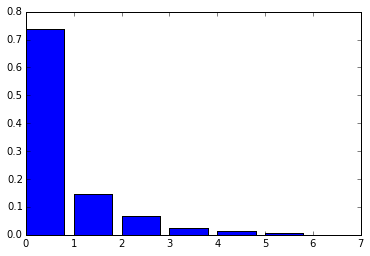

In [35]:
from sklearn.decomposition import PCA
estimator = PCA()
X_pca = estimator.fit_transform(X_train)

plt.figure()
total_variance = sum(estimator.explained_variance_)
varaince_explaned = [1.0*i/total_variance for i in estimator.explained_variance_]

plt.bar(range(len(estimator.explained_variance_)), varaince_explaned)

In [39]:
estimator = PCA(n_components = 7)
X_pca = estimator.fit_transform(X_train)

rgr = linear_model.LinearRegression()
rgr.fit(X_pca[:,0].reshape(67,1), y_train)

ValueError: total size of new array must be unchanged

In [38]:
X_pca_test = estimator.transform(X_test)
pred =rgr.predict(X_pca_test[:,0].reshape(30,1))

ValueError: total size of new array must be unchanged

In [40]:
mean_squared_error(np.array(y_test), pred)

NameError: name 'pred' is not defined